<a href="https://colab.research.google.com/github/jimmyAUT/Covid-19-tweet-sentiment-classification/blob/main/Dataset_COVID_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read zip file from google drive

In [ ]:
import pandas as pd
import zipfile
zf = zipfile.ZipFile('/content/drive/MyDrive/COMP723Data/Covid.zip')
print(zf.filelist)

[<ZipInfo filename='Corona_NLP_test.csv' compress_type=deflate file_size=1002494 compress_size=395602>, <ZipInfo filename='Corona_NLP_train.csv' compress_type=deflate file_size=10500262 compress_size=4199078>]


# Select proper encoder to read the .csv file.

In [ ]:
import chardet
# Read training data
rawdata = zf.open('Corona_NLP_train.csv').read()
result = chardet.detect(rawdata)
encoding = result['encoding']
print(encoding)
train_df = pd.read_csv(zf.open('Corona_NLP_train.csv'), encoding=encoding)

# Read test data
rawdata = zf.open('Corona_NLP_train.csv').read()
result = chardet.detect(rawdata)
encoding = result['encoding']
print(encoding)
test_df = pd.read_csv(zf.open('Corona_NLP_test.csv'), encoding=encoding)

MacRoman
MacRoman


# Checking the dataset
The dataset includes 6 columns (features). Our Task is training a model to classify what "Sentiment" of the "OriginalTweet" be.

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  
   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3        

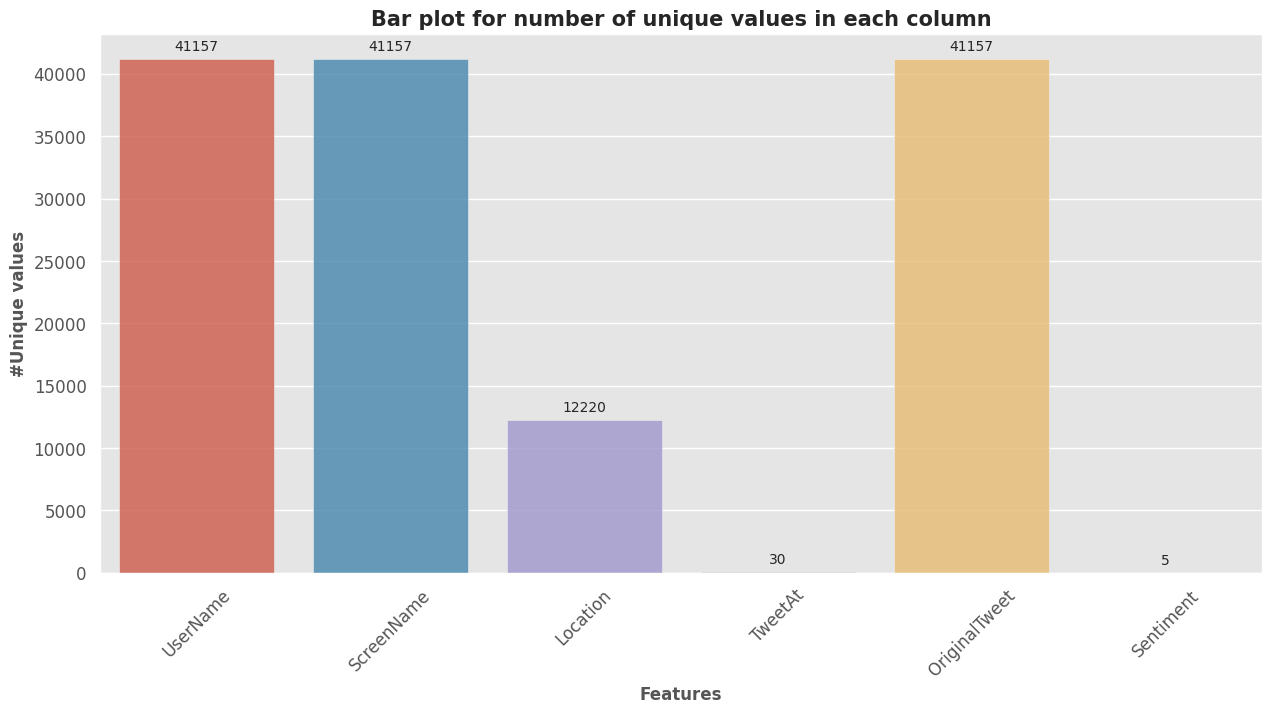

In [ ]:
print(train_df.head(5))
print(" ======================================  ")
print(test_df.head(5))

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

column_df = pd.DataFrame()
column_df['Features'] = train_df.columns
column=[]
for i in train_df.columns:
    column.append(train_df[i].nunique())
column_df['Uniques'] = column

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=column_df['Features'], y=column_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=45)
plt.show()

# Checking the distribution of sentiment data
It shows the number of each setiment is balanced.

0


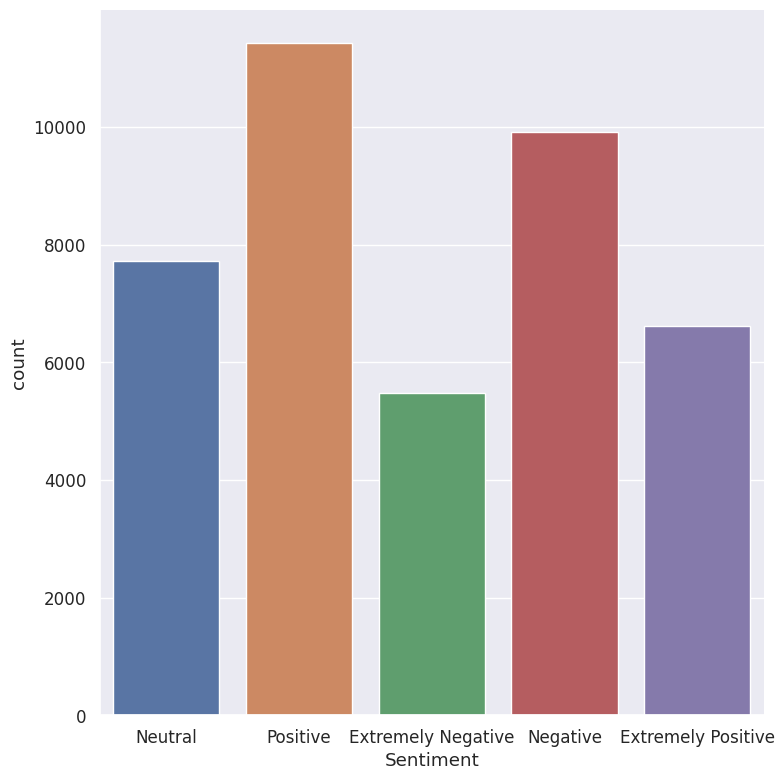

In [ ]:
import seaborn as sns
# Checking missing value
c = 0
for value in train_df["Sentiment"]:
  if value == "" :
    c+=1
print(c)

# checking distribution
sns.set(font_scale=1.1)
sns.catplot(x="Sentiment", data=train_df, kind="count", height=8)

# Import sklearn library and covert text to vector, label to number array
max_df=1.0（默认值）：词汇表中的词在文档中出现的最大频率。如果某个词在所有文档中的频率超过此值，将被视为停用词。

min_df=1（默认值）：词汇表中的词在文档中出现的最小频率。如果某个词在文档中的频率低于此值，将被忽略。

In [ ]:
train_texts = []
test_texts = []
x = []
for i in range(len(train_df["OriginalTweet"])):
  train_texts.append(train_df["OriginalTweet"][i])


for j in range(len(test_df["OriginalTweet"])):
  test_texts.append(train_df["OriginalTweet"][j])



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_features=5000)
X_train = vec.fit_transform(train_df["OriginalTweet"]).toarray()
X_test = vec.transform(test_df["OriginalTweet"]).toarray()

from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X_train_tfidf = tfidfconverter.fit_transform(X_train).toarray()
X_test_tfidf = tfidfconverter.transform(X_test).toarray()

print(X_train_tfidf)
# Convert Labels to numerical array
le = LabelEncoder()
y_train = le.fit_transform(train_df["Sentiment"])
y_test = le.fit_transform(test_df["Sentiment"])
labels = le.classes_
print(labels)
print(y_train.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.42979582 0.         0.         ... 0.         0.         0.        ]]
['Extremely Negative' 'Extremely Positive' 'Negative' 'Neutral' 'Positive']
(41157,)


# **Naive Bayes word count vector**


=================       GaussianNB       ===================


<Figure size 1000x800 with 0 Axes>

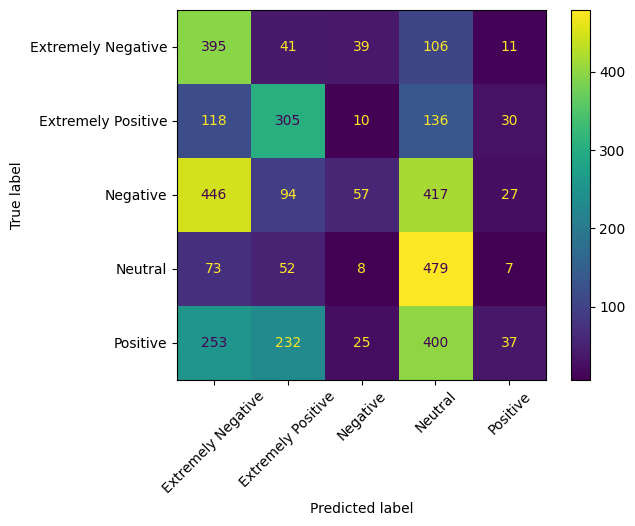


=================       GaussianNB       ===================
training accuracy Score    :  0.4277522657142163
Validation accuracy Score :  0.3351764086361243
Precision: 0.360
Recall: 0.335
F1: 0.255
              precision    recall  f1-score   support

           0       0.31      0.67      0.42       592
           1       0.42      0.51      0.46       599
           2       0.41      0.05      0.10      1041
           3       0.31      0.77      0.44       619
           4       0.33      0.04      0.07       947

    accuracy                           0.34      3798
   macro avg       0.36      0.41      0.30      3798
weighted avg       0.36      0.34      0.25      3798


=================       MultinomialNB       ===================


<Figure size 1000x800 with 0 Axes>

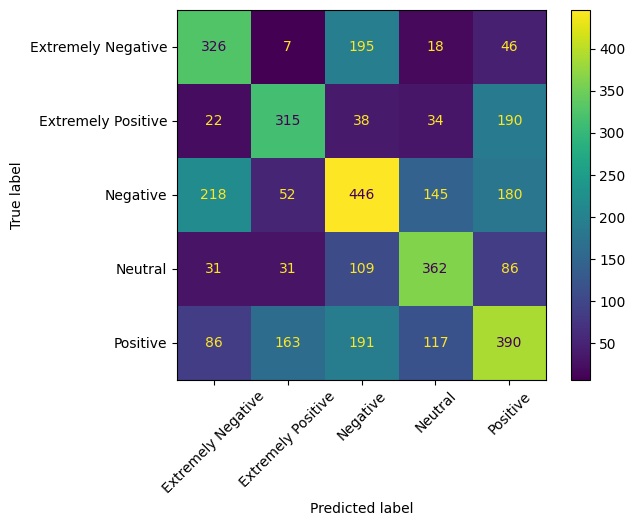


=================       MultinomialNB       ===================
training accuracy Score    :  0.5949656194572005
Validation accuracy Score :  0.48420221169036337
Precision: 0.483
Recall: 0.484
F1: 0.483
              precision    recall  f1-score   support

           0       0.48      0.55      0.51       592
           1       0.55      0.53      0.54       599
           2       0.46      0.43      0.44      1041
           3       0.54      0.58      0.56       619
           4       0.44      0.41      0.42       947

    accuracy                           0.48      3798
   macro avg       0.49      0.50      0.50      3798
weighted avg       0.48      0.48      0.48      3798


=================       ComplementNB       ===================


<Figure size 1000x800 with 0 Axes>

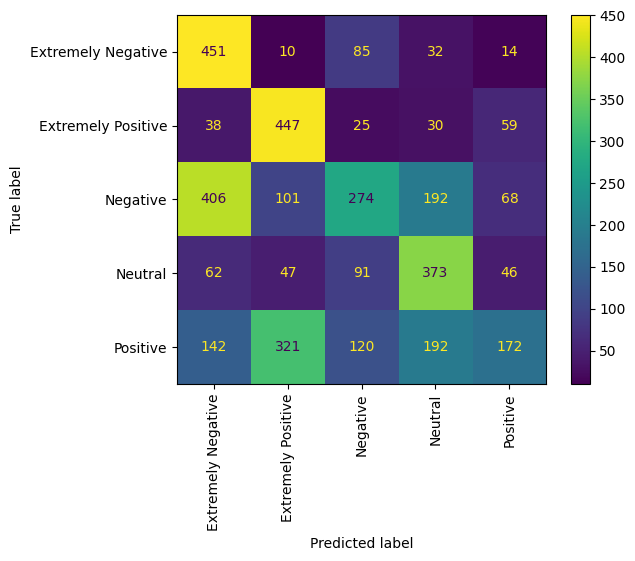


=================       ComplementNB       ===================
training accuracy Score    :  0.5371382753845032
Validation accuracy Score :  0.45208004212743547
Precision: 0.460
Recall: 0.452
F1: 0.418
              precision    recall  f1-score   support

           0       0.41      0.76      0.53       592
           1       0.48      0.75      0.59       599
           2       0.46      0.26      0.33      1041
           3       0.46      0.60      0.52       619
           4       0.48      0.18      0.26       947

    accuracy                           0.45      3798
   macro avg       0.46      0.51      0.45      3798
weighted avg       0.46      0.45      0.42      3798



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('\n=================       GaussianNB       ===================')
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45)
plt.show()
print('\n=================       GaussianNB       ===================')
print("training accuracy Score    : ",gnb.score(X_train,y_train))
print("Validation accuracy Score : ",accuracy_score(y_test,y_pred) )
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print(classification_report(y_test, y_pred))

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print('\n=================       MultinomialNB       ===================')
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45)
plt.show()
print('\n=================       MultinomialNB       ===================')
print("training accuracy Score    : ",mnb.score(X_train,y_train))
print("Validation accuracy Score : ",accuracy_score(y_test,y_pred) )
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print(classification_report(y_test, y_pred))

# ComplementNB

cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_test)
print('\n=================       ComplementNB       ===================')
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=90)
plt.show()

print('\n=================       ComplementNB       ===================')
print("training accuracy Score    : ",cnb.score(X_train,y_train))
print("Validation accuracy Score : ",accuracy_score(y_test,y_pred) )
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print(classification_report(y_test, y_pred))


# Naive Bayes with TF-IDF vecotr


=================       GaussianNB       ===================


<Figure size 1000x800 with 0 Axes>

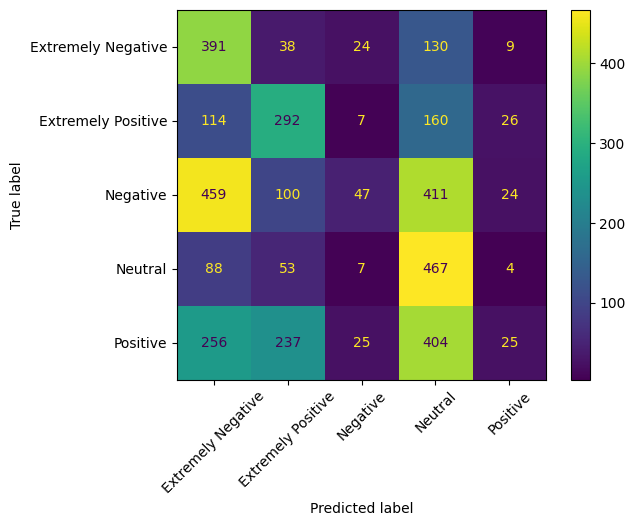


=================       GaussianNB       ===================
training accuracy Score    :  0.41876230045921714
Validation accuracy Score :  0.32174828857293314
Precision: 0.347
Recall: 0.322
F1: 0.238
              precision    recall  f1-score   support

           0       0.30      0.66      0.41       592
           1       0.41      0.49      0.44       599
           2       0.43      0.05      0.08      1041
           3       0.30      0.75      0.43       619
           4       0.28      0.03      0.05       947

    accuracy                           0.32      3798
   macro avg       0.34      0.39      0.28      3798
weighted avg       0.35      0.32      0.24      3798


=================       MultinomialNB       ===================


<Figure size 1000x800 with 0 Axes>

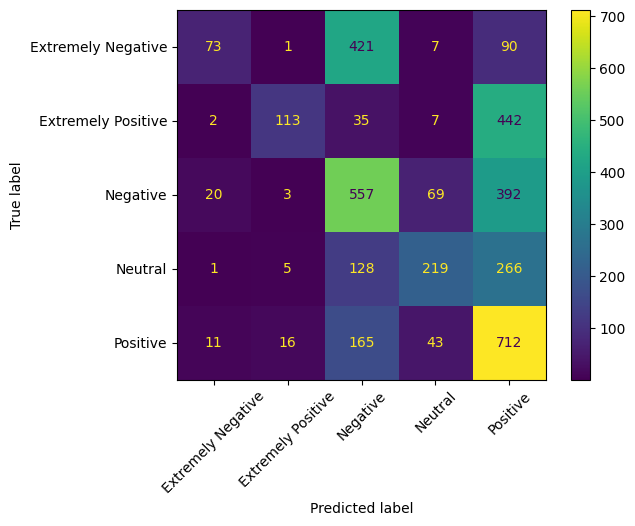


=================       MultinomialNB       ===================
training accuracy Score    :  0.5603664018271497
Validation accuracy Score :  0.44075829383886256
Precision: 0.549
Recall: 0.441
F1: 0.410
              precision    recall  f1-score   support

           0       0.68      0.12      0.21       592
           1       0.82      0.19      0.31       599
           2       0.43      0.54      0.47      1041
           3       0.63      0.35      0.45       619
           4       0.37      0.75      0.50       947

    accuracy                           0.44      3798
   macro avg       0.59      0.39      0.39      3798
weighted avg       0.55      0.44      0.41      3798


=================       ComplementNB       ===================


<Figure size 1000x800 with 0 Axes>

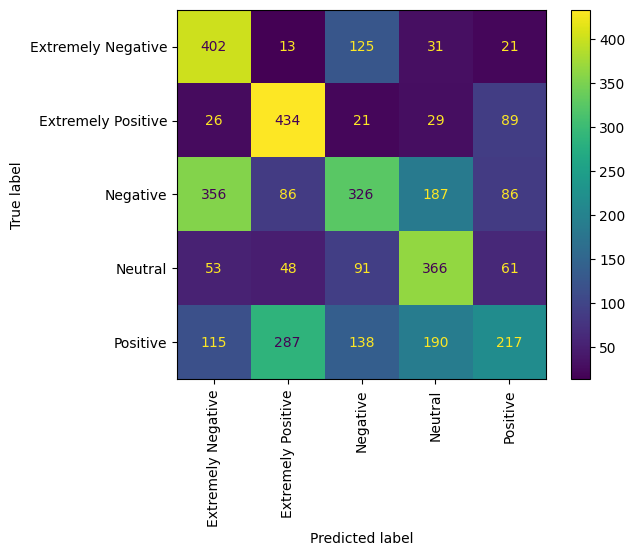


=================       ComplementNB       ===================
training accuracy Score    :  0.563816604708798
Validation accuracy Score :  0.45945234333859925
Precision: 0.461
Recall: 0.459
F1: 0.437
              precision    recall  f1-score   support

           0       0.42      0.68      0.52       592
           1       0.50      0.72      0.59       599
           2       0.47      0.31      0.37      1041
           3       0.46      0.59      0.51       619
           4       0.46      0.23      0.31       947

    accuracy                           0.46      3798
   macro avg       0.46      0.51      0.46      3798
weighted avg       0.46      0.46      0.44      3798



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt

gnb = GaussianNB()
gnb.fit(X_train_tfidf, y_train)
y_pred = gnb.predict(X_test_tfidf)
print('\n=================       GaussianNB       ===================')
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45)
plt.show()
print('\n=================       GaussianNB       ===================')
print("training accuracy Score    : ",gnb.score(X_train_tfidf,y_train))
print("Validation accuracy Score : ",accuracy_score(y_test,y_pred) )
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print(classification_report(y_test, y_pred))

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
y_pred = mnb.predict(X_test_tfidf)
print('\n=================       MultinomialNB       ===================')
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45)
plt.show()
print('\n=================       MultinomialNB       ===================')
print("training accuracy Score    : ",mnb.score(X_train_tfidf,y_train))
print("Validation accuracy Score : ",accuracy_score(y_test,y_pred) )
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print(classification_report(y_test, y_pred))

# ComplementNB

cnb = ComplementNB()
cnb.fit(X_train_tfidf, y_train)
y_pred = cnb.predict(X_test_tfidf)
print('\n=================       ComplementNB       ===================')
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=90)
plt.show()

print('\n=================       ComplementNB       ===================')
print("training accuracy Score    : ",cnb.score(X_train_tfidf,y_train))
print("Validation accuracy Score : ",accuracy_score(y_test,y_pred) )
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print(classification_report(y_test, y_pred))


# **Neural Network without text pre-processing**
1.sklearn MLP classifier

2.tensorflow sequential

In [ ]:
# NN model training history plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(max_iter=100 ,random_state=42)
pipe_mlp = make_pipeline(mlp_classifier)

param_grid = [{'mlpclassifier__hidden_layer_sizes': [(1000,500),(100,50,10),(50,50,50,50),(10, 10, 10),(50,20 10),(10, 5, 2),(10, 10),(10, 5)]}]
gs = GridSearchCV(estimator=pipe_mlp, param_grid=param_grid, scoring='accuracy')
gs.fit(X_train, y_train)
gs.score(X_train, y_train)
print('Best model:' ,gs.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Best model: Pipeline(steps=[('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=100,
                               random_state=42))])


# MLP with word count vector


=================       MLP classifier       ===================


<Figure size 1000x800 with 0 Axes>

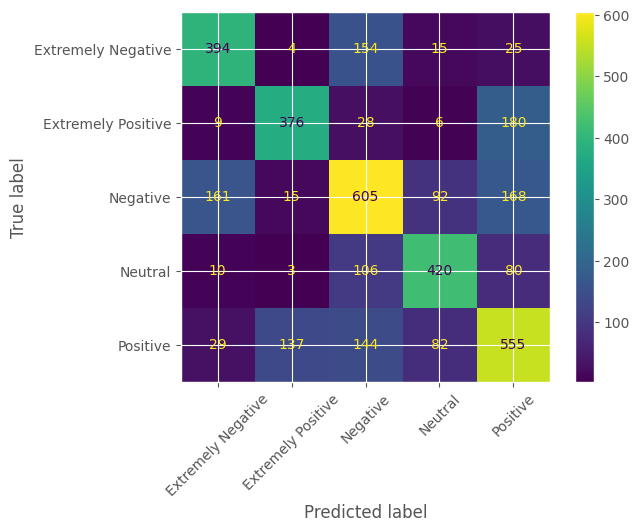

Precision: 0.621
Recall: 0.619
F1: 0.619
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       592
           1       0.70      0.63      0.66       599
           2       0.58      0.58      0.58      1041
           3       0.68      0.68      0.68       619
           4       0.55      0.59      0.57       947

    accuracy                           0.62      3798
   macro avg       0.63      0.63      0.63      3798
weighted avg       0.62      0.62      0.62      3798



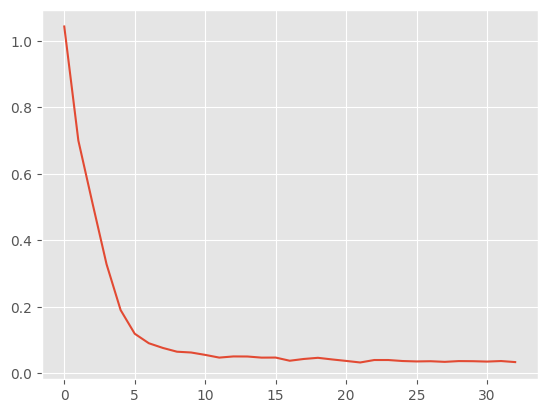

In [ ]:
# 1.MLP classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50,10), max_iter=50, random_state=42,batch_size=32)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print('\n=================       MLP classifier       ===================')
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45)
plt.show()
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print(classification_report(y_test, y_pred))
plt.plot(mlp.loss_curve_)

# MLP with TFIDF vector


=================       MLP classifier       ===================


<Figure size 1000x800 with 0 Axes>

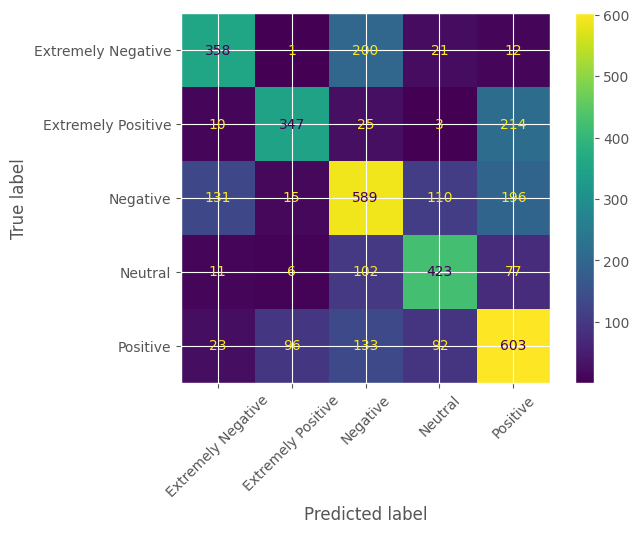

Precision: 0.619
Recall: 0.611
F1: 0.612
              precision    recall  f1-score   support

           0       0.67      0.60      0.64       592
           1       0.75      0.58      0.65       599
           2       0.56      0.57      0.56      1041
           3       0.65      0.68      0.67       619
           4       0.55      0.64      0.59       947

    accuracy                           0.61      3798
   macro avg       0.64      0.61      0.62      3798
weighted avg       0.62      0.61      0.61      3798



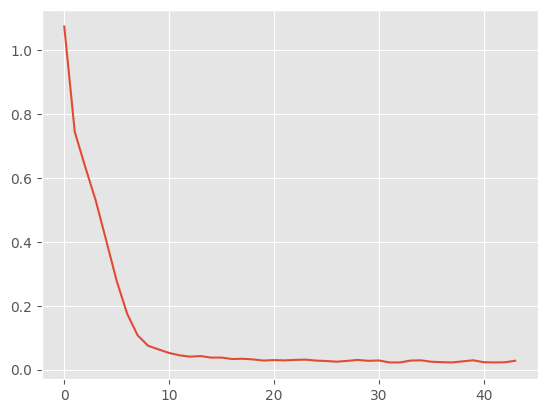

In [ ]:
# 1.MLP classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50,10), max_iter=50, random_state=42,batch_size=32)
mlp.fit(X_train_tfidf,y_train)
y_pred = mlp.predict(X_test_tfidf)
print('\n=================       MLP classifier       ===================')
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45)
plt.show()
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print(classification_report(y_test, y_pred))
plt.plot(mlp.loss_curve_)

In [ ]:
#Transform to OneHotEncoder from Scikit-learn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
train_labels = y_train.reshape((-1, 1)) # change to a column vector from a row vector.
Y_train=encoder.fit_transform(train_labels) #transform to a nxm matrix where n = number of datapoints and m is the number of labels.
test_labels = y_test.reshape((-1, 1))
Y_test=encoder.fit_transform(test_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# NN with word count vector

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 100)               500100    
                                                                 
 hidden1 (Dense)             (None, 50)                5050      
                                                                 
 hidden2 (Dense)             (None, 10)                510       
                                                                 
 output (Dense)              (None, 5)                 55        
                                                                 
Total params: 505715 (1.93 MB)
Trainable params: 505715 (1.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


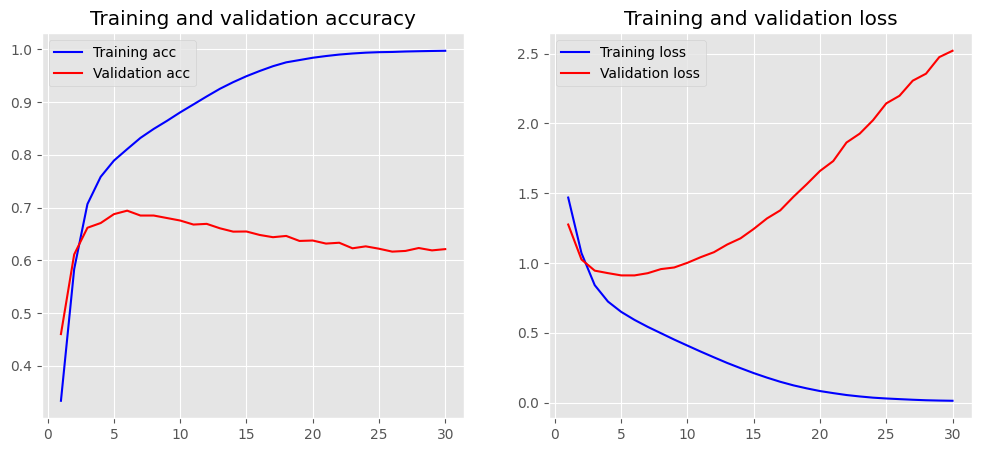

In [ ]:
# 2. sequential neural network model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(100, input_dim=5000, activation='relu',name='input'))
model.add(Dense(50, activation='relu',name='hidden1'))
model.add(Dense(10, activation='relu',name='hidden2'))
model.add(Dense(5, activation='softmax',name='output'))
print(model.summary())
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=30, verbose=False,batch_size=32,validation_data=(X_test, Y_test))
plot_history(history)

119/119 [==============================] - 0s 2ms/step
0  V.S.  3
4  V.S.  4
1  V.S.  1
2  V.S.  2
3  V.S.  3
3  V.S.  3
4  V.S.  4
3  V.S.  2
0  V.S.  0
1  V.S.  4


<Figure size 1000x800 with 0 Axes>

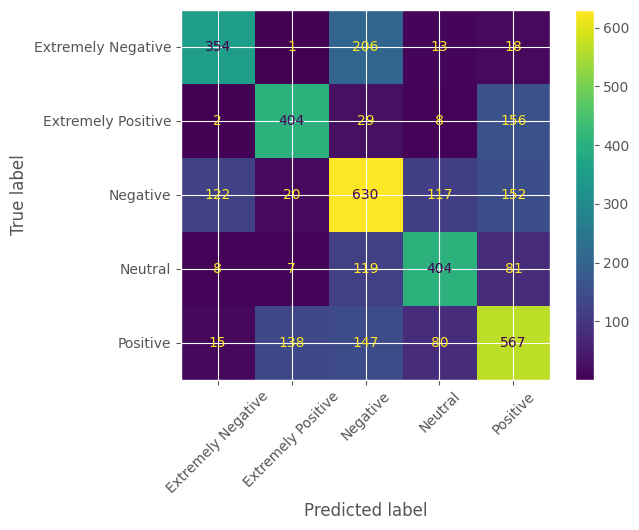

Training Accuracy: 0.9980
accuracy: 0.6211163997650146
Precision: 0.626
Recall: 0.621
F1: 0.622
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       592
           1       0.71      0.67      0.69       599
           2       0.56      0.61      0.58      1041
           3       0.65      0.65      0.65       619
           4       0.58      0.60      0.59       947

    accuracy                           0.62      3798
   macro avg       0.64      0.63      0.63      3798
weighted avg       0.63      0.62      0.62      3798



In [ ]:

# Plot NN model confusion matrix
import numpy as np
y_pred_m = model.predict(X_test)
y_pred = []
for m in y_pred_m:
  max_index = np.argmax(m)
  y_pred.append(max_index)

for i in range(10):
    print(y_test[i], " V.S. ", y_pred[i])


confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45)
plt.show()
# evaluate the model
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("accuracy:", accuracy)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print(classification_report(y_test, y_pred))

## NN with tf-idf vector

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 100)               500100    
                                                                 
 hidden1 (Dense)             (None, 50)                5050      
                                                                 
 hidden2 (Dense)             (None, 10)                510       
                                                                 
 output (Dense)              (None, 5)                 55        
                                                                 
Total params: 505715 (1.93 MB)
Trainable params: 505715 (1.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


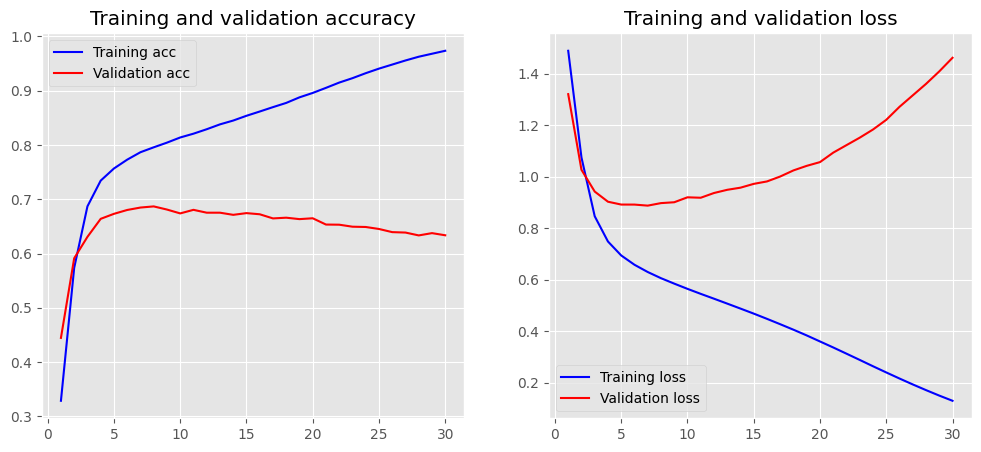

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(100, input_dim=5000, activation='relu',name='input'))
model.add(Dense(50, activation='relu',name='hidden1'))
model.add(Dense(10, activation='relu',name='hidden2'))
model.add(Dense(5, activation='softmax',name='output'))
print(model.summary())
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_tfidf, Y_train, epochs=30, verbose=False,batch_size=32,validation_data=(X_test_tfidf, Y_test))
plot_history(history)



119/119 [==============================] - 0s 2ms/step
0  V.S.  3
4  V.S.  4
1  V.S.  1
2  V.S.  2
3  V.S.  4
3  V.S.  3
4  V.S.  1
3  V.S.  4
0  V.S.  0
1  V.S.  4


<Figure size 1000x800 with 0 Axes>

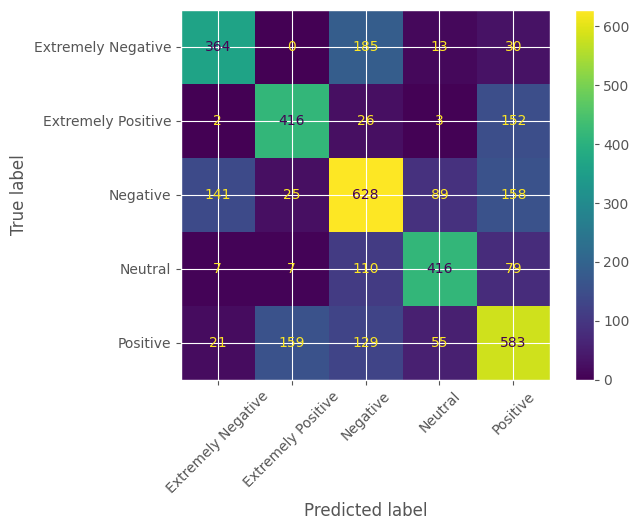

Training Accuracy: 0.9816
accuracy: 0.6337546110153198
Precision: 0.637
Recall: 0.634
F1: 0.635
              precision    recall  f1-score   support

           0       0.68      0.61      0.65       592
           1       0.69      0.69      0.69       599
           2       0.58      0.60      0.59      1041
           3       0.72      0.67      0.70       619
           4       0.58      0.62      0.60       947

    accuracy                           0.63      3798
   macro avg       0.65      0.64      0.64      3798
weighted avg       0.64      0.63      0.63      3798



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
# Plot NN model confusion matrix
import numpy as np
y_pred_m = model.predict(X_test_tfidf)
y_pred = []
for m in y_pred_m:
  max_index = np.argmax(m)
  y_pred.append(max_index)

for i in range(10):
    print(y_test[i], " V.S. ", y_pred[i])


confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45)
plt.show()
# evaluate the model
loss, accuracy = model.evaluate(X_train_tfidf, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_tfidf, Y_test, verbose=False)
print("accuracy:", accuracy)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print(classification_report(y_test, y_pred))

# CNN

Epoch 1/20
644/644 [==============================] - 23s 32ms/step - loss: 1.1670 - accuracy: 0.5107 - val_loss: 0.9044 - val_accuracy: 0.6611
Epoch 2/20
644/644 [==============================] - 8s 12ms/step - loss: 0.8126 - accuracy: 0.6991 - val_loss: 0.8464 - val_accuracy: 0.6875
Epoch 3/20
644/644 [==============================] - 5s 7ms/step - loss: 0.6778 - accuracy: 0.7583 - val_loss: 0.8534 - val_accuracy: 0.6880
Epoch 4/20
644/644 [==============================] - 6s 9ms/step - loss: 0.5330 - accuracy: 0.8161 - val_loss: 0.9346 - val_accuracy: 0.6809
Epoch 5/20
644/644 [==============================] - 5s 7ms/step - loss: 0.3928 - accuracy: 0.8657 - val_loss: 1.0204 - val_accuracy: 0.6709
Epoch 6/20
644/644 [==============================] - 4s 6ms/step - loss: 0.2807 - accuracy: 0.9060 - val_loss: 1.2025 - val_accuracy: 0.6667
Epoch 7/20
644/644 [==============================] - 5s 8ms/step - loss: 0.2058 - accuracy: 0.9312 - val_loss: 1.4014 - val_accuracy: 0.6585
Epo

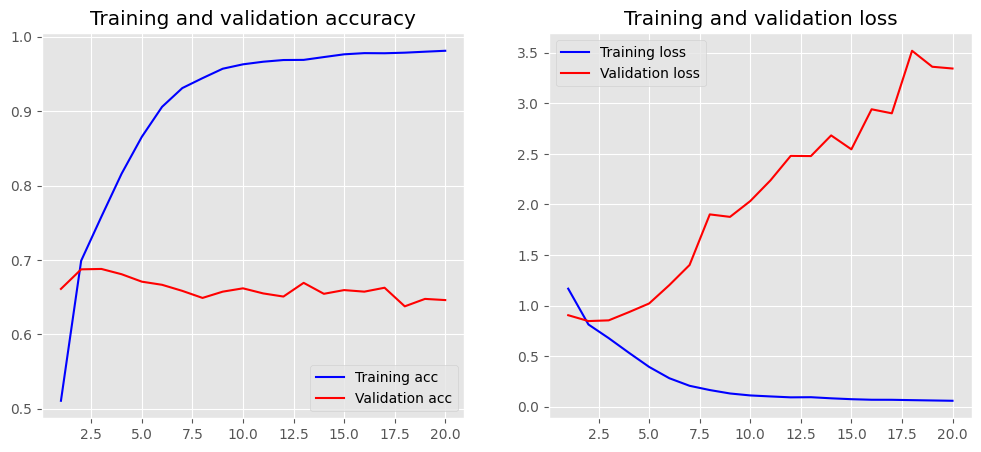

In [ ]:
"""               CNN                 """
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam


max_words = 5000
maxlen=100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df["OriginalTweet"])
X_train = tokenizer.texts_to_sequences(train_df["OriginalTweet"])
X_test = tokenizer.texts_to_sequences(test_df["OriginalTweet"])
X_train_pad = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test, padding='post', maxlen=maxlen)
# 构建CNN模型
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=X_train_pad.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# 训练模型
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_data=(X_test_pad, y_test))
plot_history(history)


119/119 [==============================] - 0s 3ms/step
0
0  V.S.  2
4  V.S.  4
1  V.S.  1
2  V.S.  2
3  V.S.  2
3  V.S.  3
4  V.S.  4
3  V.S.  2
0  V.S.  2
1  V.S.  4


<Figure size 1000x800 with 0 Axes>

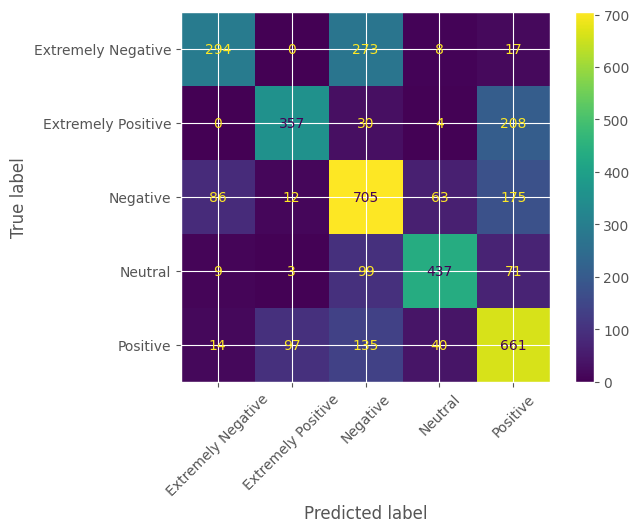

Precision: 0.664
Recall: 0.646
F1: 0.647
              precision    recall  f1-score   support

           0       0.73      0.50      0.59       592
           1       0.76      0.60      0.67       599
           2       0.57      0.68      0.62      1041
           3       0.79      0.71      0.75       619
           4       0.58      0.70      0.64       947

    accuracy                           0.65      3798
   macro avg       0.69      0.63      0.65      3798
weighted avg       0.66      0.65      0.65      3798



In [ ]:
import numpy as np
y_pred_pad = model.predict(X_test_pad)

print(y_test[0])
y_pred = []
for m in y_pred_pad:
  max_index = np.argmax(m)
  y_pred.append(max_index)

for i in range(10):
    print(y_test[i], " V.S. ", y_pred[i])

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45)
plt.show()
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average="weighted"))
print(classification_report(y_test, y_pred))